# Open Food Facts

In [255]:
import numpy as np
import matplotlib
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()


data = pandas.read_csv("/home/clebson/Documents/datasets/OpenFoodFacts/en.openfoodfacts.org.products.csv",
                       sep="\t")

# Let's see the most popular countries in this dataset
I'm considering the most popular country as the country that contributed the most with the data. First, let's filter the data:
* The attributes that identifies the countries are: countries (text), countries_tags (text) and countries_en (text). However, the attributes countries and countries_tags are prone to lead to errors, since most of the tuples are undefined. Therefore, I choose to maintain only the tuples with the attribute countries_en, since only 223 doesn't have this attribute. Thus, only tuples in which the countrie_en attribute were not None was maintained.
* As we can observe in the histogram bellow, the country that contributted the most was France, with almost 60% of the whole data collection.

In [208]:
def build_dictionary(data, attribute):
    dictionary = dict()
    for value in data[attribute]:
        if(value in dictionary):
            dictionary[value] +=  1
        else:
            dictionary[value] = 1
    return dictionary

def sort_dictionary(dictionary, reverse_=False):
    return sorted(dictionary.items(), key=lambda x: x[1], reverse=reverse_)

famous_countries = build_dictionary(data, 'countries_en')
famous_countries = sort_dictionary(famous_countries, True)
famous_countries = pandas.DataFrame(famous_countries, columns=['Country', 'Contribution'])

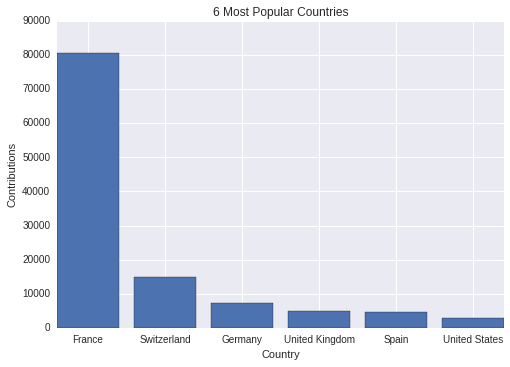

In [230]:
plt.xticks(range(6), famous_countries['Country'][0:6])
plt.bar(range(6), famous_countries['Contribution'][0:6], align="center")
plt.title("6 Most Popular Countries")
plt.ylabel("Contributions")
plt.xlabel("Country")

# The most popular product in each Country
* Now let's see what are the most popular product for the 6 first countries.

In [248]:
france = data[data['countries_en'] == 'France']
switzerland = data[data['countries_en'] == 'Switzerland']
germany = data[data['countries_en'] == 'Germany']
united_kingdom = data[data['countries_en'] == 'United Kingdom']
spain = data[data['countries_en'] == 'Spain']
usa = data[data['countries_en'] == 'United States']

france_product = build_dictionary(france, 'product_name')
afrance = np.asarray(sort_dictionary(france_product, True))[1:10,:]

switzerland_product = build_dictionary(switzerland, 'product_name')
aswitzerland = np.asarray(sort_dictionary(switzerland_product, True))[1:10,:]

germany_product = build_dictionary(germany, 'product_name')
agermany = np.asarray(sort_dictionary(germany_product, True))[1:10,:]

united_kingdom_product = build_dictionary(united_kingdom, 'product_name')
auk = np.asarray(sort_dictionary(united_kingdom_product, True))[1:10,:]

spain_product = build_dictionary(spain, 'product_name')
aspain = np.asarray(sort_dictionary(spain_product, True))[1:10,:]

usa_product = build_dictionary(usa, 'product_name')
ausa = np.asarray(sort_dictionary(usa_product, True))[1:10, :]

# Remove special characters.
def removeSpecialCharacters(data):
    for i in xrange(len(data)):
        data[i][0] = data[i][0].replace("&quot", "").replace("\xc3", "").replace("\xa1n", "").replace("\xb3", "")
        data[i][0] = data[i][0].replace("\xad", "").replace("\xa9", "").replace(" ;", "; ");
    return data

afrance = removeSpecialCharacters(afrance)
aswitzerland = removeSpecialCharacters(aswitzerland)
agermany = removeSpecialCharacters(agermany)
auk = removeSpecialCharacters(auk)
aspain = removeSpecialCharacters(aspain)
ausa = removeSpecialCharacters(ausa)

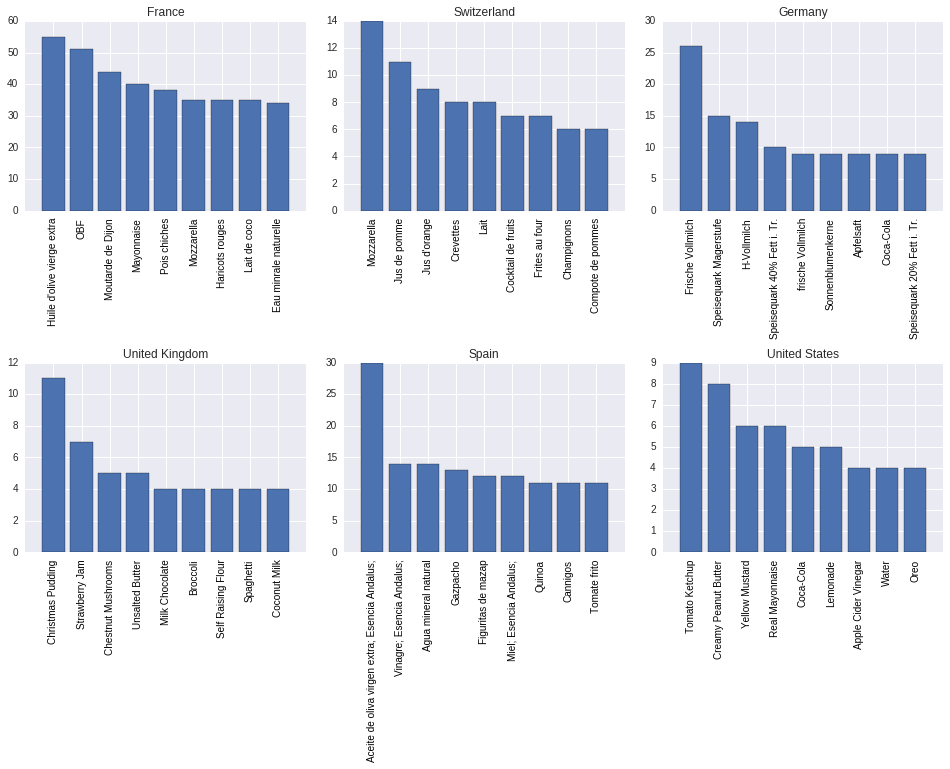

In [254]:
f, axarr = plt.subplots(nrows=2, ncols=3)

def plot_bar_chart(line, col, array, name):
    axarr[line][col].bar(range(len(array[:,1])), array[:,1], align="center")
    plt.sca(axarr[line][col])
    plt.xticks(range(len(afrance[:,1])), array[:, 0], color='black', rotation='vertical')
    axarr[line][col].set_title(name)

plot_bar_chart(0, 0, afrance, "France")
plot_bar_chart(0, 1, aswitzerland, "Switzerland")
plot_bar_chart(0, 2, agermany, "Germany")
plot_bar_chart(1, 0, auk, "United Kingdom")
plot_bar_chart(1, 1, aspain, "Spain")
plot_bar_chart(1, 2, ausa, "United States")
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)

## Looking at the individual products for each country in the chart above, we can verify that the 5 most important products in the data collection for the countries are:
* Frace
    * Olive Oil
    * OBF: All sorts of products for skin
    * Moustard
    * Mayonnaise
    * Pois chiches
* Switzerland
    * Mozzarella
    * Jus de pomme
    * Jus d'orange
    * Crevettes
    * Lait
* Germany
    * Frische Vollmilch
    * Speisequark Magerstufe
    * H-Vollmilch
    * Speisequark 40% Fett i. Tr.
    * frische Vollmilch'
* UK
    * Christmas Pudding
    * Strawberry Jam
    * Chestnut Mushrooms
    * Unsalted Butter
    * Milk Chocolate
* Spain
    * Aceite de oliva virgen extra
    * Esencia Andalus;
    * Vinagre; Esencia Andalus;
    * Agua mineral natural
    * Gazpacho
    * Figuritas de mazap'
* USA
    * Tomato Ketchup
    * Creamy Peanut Butter
    * Yellow Mustard
    * Real Mayonnaise
    * Coca Cola

## As we can observe, the second most popular product OBF for the country France is not Food Related. As we can see in the images retrieved from the urls in the dataset, all of are skin related products.

In [11]:
[x for x in france[france['product_name']=="OBF"]["image_url"][0:3]]

['http://en.openfoodfacts.org/images/products/200/000/000/6642/front.5.400.jpg',
 'http://en.openfoodfacts.org/images/products/20277246/front.3.400.jpg',
 'http://en.openfoodfacts.org/images/products/20456887/front.3.400.jpg']

<img src= 'http://en.openfoodfacts.org/images/products/200/000/000/6642/front.5.400.jpg',width=200,height=200>
<img src= 'http://en.openfoodfacts.org/images/products/20277246/front.3.400.jpg', width=200,height=200>
<img src= 'http://en.openfoodfacts.org/images/products/20456887/front.3.400.jpg', width=200,height=200>